---
title: "Fisherian reduction for the t-Test"
author: Stefan Heyder
date: '2022-02-08'
date-modified: '2023-11-28'
slug: fisherian-reduction-for-the-t-test
categories: []
tags: []
draft: false
bibliography: ['references.bib']
---



In the second chapter of [@Cox2006Principles] the authors talks about a _Fisherian reduction_ which I think of as a framework of doing inference given a sufficient statistic $S$.
An interesting point here is that one can use the conditional distribution of the data, $X_1, \dots, X_n$ say, on $S$ to evaluate the fit of the model.

In this post I want to explore this concept in the setting of a standard $t$-Test, i.e. we have $X_i \overset{\text{i.i.d}}{\sim} \mathcal N(\mu, \sigma^2)$. The parameter of interest is of course $\mu$ and $S = (\bar X_n, \hat\sigma^2_{n})$ is a sufficient statistic, with $\hat\sigma^2_n$ the empirical variance.

To apply the _Fisherian reduction_ we thus need to find the conditional distribution of $X = \left(X_1, \dots, X_n\right)$ on $\bar X_n$, i.e.$X | \bar X_n$.
For this, let $A = \left(A_1, B\right)  \in \mathbf R^{n\times n}$ be an orthogonal matrix whose first column is $$A_1 = \left(\frac 1 {\sqrt{n}}, \dots , \frac 1 {\sqrt{n}} \right).$$

Then $Y = A^TX \sim \mathcal N \left(\mu A^T\mu \mathbf 1, \sigma^2 I_{n}\right)$ and $Y = \left(\sqrt{n} \bar X_n, Z\right)$ where $Z \sim \mathcal N \left(\sigma^2 I_{n - 1}\right)$, $Z$ and $\bar X_n$ being independent.

Transforming back we obtain the conditional distribution we sought:
$$ X | \bar X_n \sim AY | \bar X_n \mathbf 1 \sim \bar X_n + B Z$$

The catch here is that $B$ is a $n\times (n - 1)$ dimensional matrix, so $X | \bar X_n$ has a normal distribution of dimension $n-1$, e.g. the variance-covariance matrix is rank-deficient.

Let's verify this through simulation.

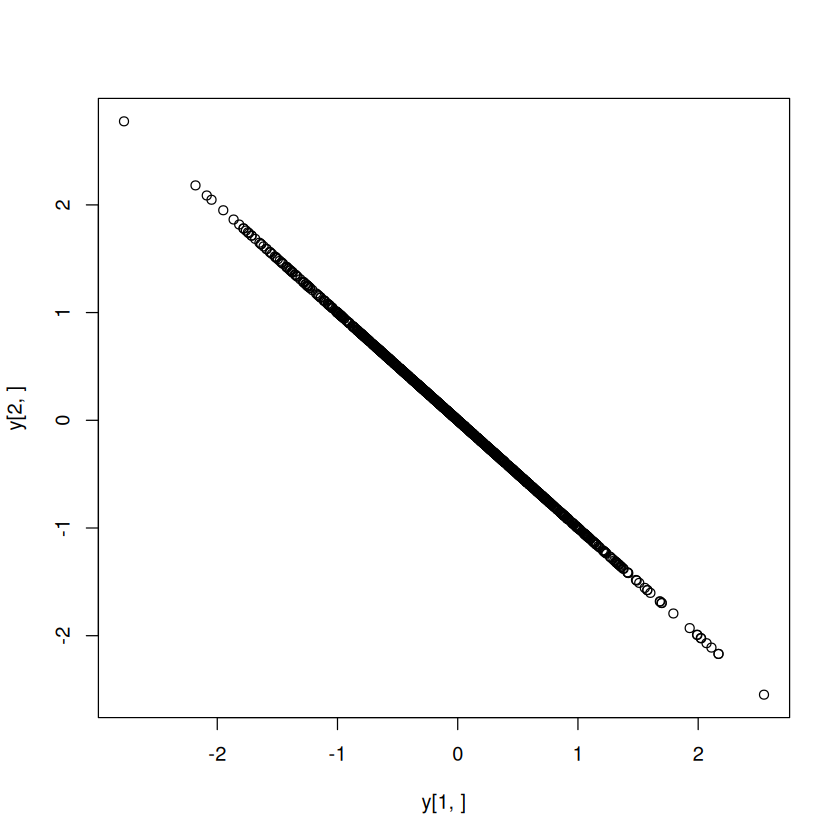

[1] 0.007553103
[1] 1.05018


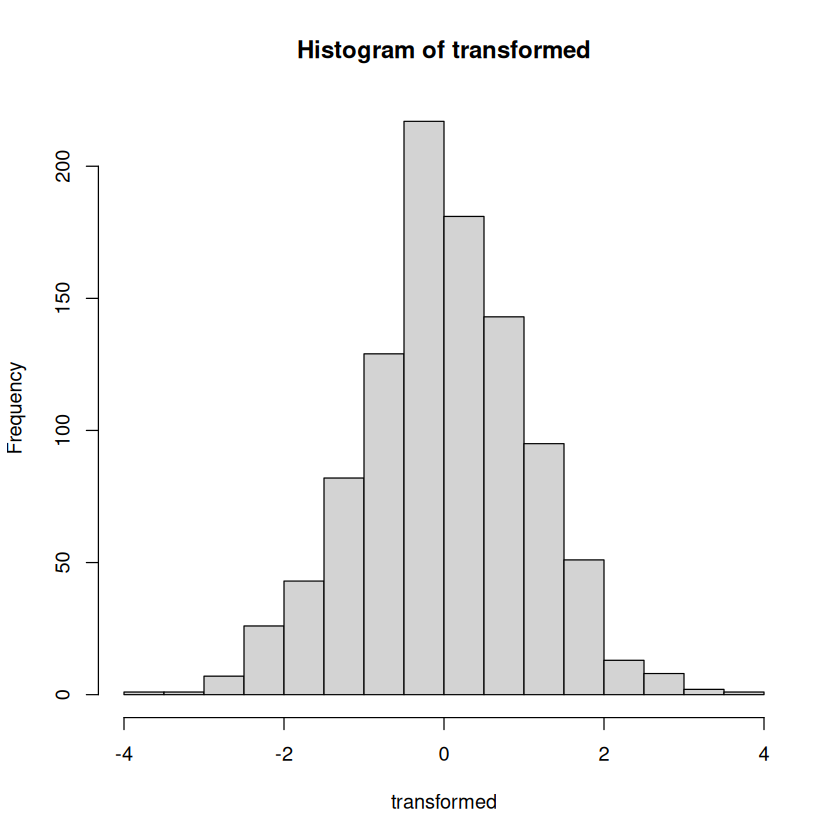

In [1]:
mu <- 10
sigma <- 1
n <- 2
m <- 1000
x <- matrix(rnorm(n * m, mu, sigma), nrow= n)

y <- t(t(x) - colMeans(x))

transformed <- c(matrix(c(1/sqrt(2), -1/sqrt(2)), nrow = 1) %*% y)

plot(y[1,], y[2,])

hist(transformed)
print(mean(transformed))
print(sd(transformed))